# Logistic regression example
Code taken from:
https://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html

We will use Logistic Regression to calculate the probability for a student to pass an exam given the number of hours of study and number of hours slept:

$$p(\text{passed}) = \sigma(w_0 + w_1 \cdot \text{hours studied} + w_2 \cdot \text{hours slept})$$

### Initialize

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import optimize # for fit
%matplotlib inline
rng = np.random.RandomState(0)

## 1. Read data

We first start to read a `cvs` file containing, for each student, the number of hours studied and slept (=the `features`) and the result (=the `labels`) of the exam: 0 (Failed) or 1 (passed).

a) Separate the sample in student that passed the exam and student that failed the exam:
```python
labels = ...
student_passed = ...
student_failed = ...
```

b) Show on a figure for each student the number of hours slept as a function of the number of hours studied. Use a blue marker for students that passed and a red marker for those who failed.

   Studied      Slept   Passed
[[ 3.189   4.4051  0.    ]
 [-1.4728  5.1665  0.    ]
 [ 3.1545  8.1615  1.    ]
 [ 3.9107  4.5564  0.    ]
 [ 6.3609  5.1747  1.    ]
 [ 0.4476  8.8556  0.    ]
 [ 0.8119 11.1713  1.    ]
 [ 5.438   6.1872  1.    ]
 [ 1.6438  1.5493  0.    ]
 [ 5.1472  4.131   0.    ]]


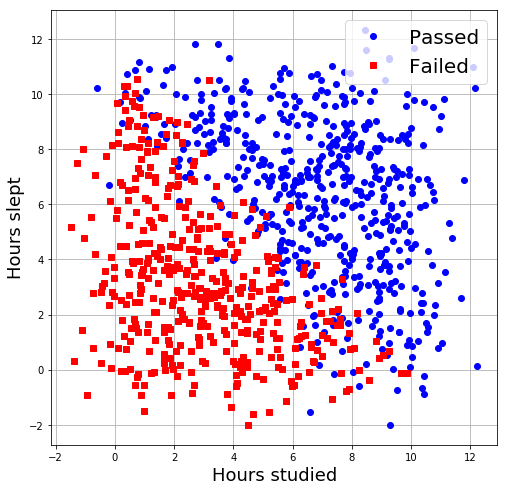

In [2]:
# Load and read file
from numpy import genfromtxt
my_data = genfromtxt('data_classification2.csv', delimiter=',')
print('%10s %10s %8s'% ('Studied', 'Slept', 'Passed'))

# Print first 10 entries
print(my_data[:10,:])

# Get data labels
labels=my_data[:,2]

# Separate sample in students that pass and that fail
student_passed = my_data[labels>0]
student_failed = my_data[labels<1]

# Show data
fig, axes = plt.subplots(figsize=(8,8))
axes.plot(student_passed[:,0],student_passed[:,1],'bo',lw=1,label='Passed')
axes.plot(student_failed[:,0],student_failed[:,1],'rs',lw=1,label='Failed')
axes.set_xlabel('Hours studied',fontsize=18)
axes.set_ylabel('Hours slept',fontsize=18)
axes.grid()
plt.legend(loc='upper right',fontsize=20)

## 2. Separate data in train and test sample

a) You'll note below that we add a column of "1" to the vector of features ${\bf x}$. Why do we do that ? The vector ${\bf x}$ is redefined as ${\bf x^*}$:
$${\bf x} \rightarrow {\bf x^*}$$

b) Separate the sample in two: the first 500 entries for training and the remaining 500 entries for testing.
```python
features_train = ...
labels_train = ...
features_test = ...
labels_test = ...
```


In [3]:
# Data features: [1, studied, slept]
features = my_data[:,0:2]
bias = np.ones(shape=(len(features),1))
features = np.append(bias, features, axis=1)

# N examples for train and test
N=500

# Train dataset
features_train = features[:N,:]
labels_train = labels[:N]

# Test dataset
features_test = features[N:2*N,:]
labels_test = labels[N:2*N]


## 3. Sigmoid function

For training the Logistic Regression we'll need the sigmoid function and its derivative

a) Write two functions, `sigmoid(x)` and `dsig(x)` that returns, respectively $\sigma(x)$ and $\frac{\text{d} \sigma}{\text{d} x}(x)$.

b) Represent graphically both functions on the same figure.

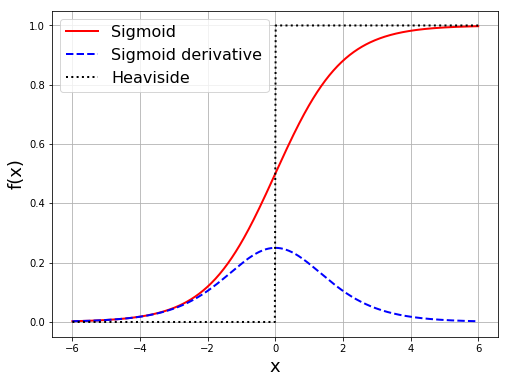

In [4]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def dsig(x):
    return sigmoid(x)*(1-sigmoid(x))

# Plot sigmoid function
x = np.linspace(-6,6,500)
fig, axes = plt.subplots(figsize=(8,6))
axes.plot(x,sigmoid(x),'r-',lw=2,label='Sigmoid')
axes.plot(x,dsig(x),'b--',lw=2,label='Sigmoid derivative')
axes.plot(x,np.heaviside(x,0),'k:',lw=2,label='Heaviside')
axes.set_xlabel('x',fontsize=18)
axes.set_ylabel('f(x)',fontsize=18)
axes.grid()
plt.legend(loc='upper left',fontsize=16)

## 4. Function definitions

The predictive model for a feature ${\bf x}$ is given by the function:

$$f({\bf x}) = \sigma \left( w_0 + \sum_{i=1}^D w_i x_i \right) = \sigma \left(\sum_{i=0}^D w_i x^*_i \right)$$

The cost function used in the Logistic Regression is the cross-entropy:

$$E({\bf w}) = - \sum_{j=1}^N t_j \log( f({\bf x_j})) + (1-t_j) \log( 1 - f({\bf x_j}))$$

The gradient of the cross-entropy function is:
$$
\vec{\nabla} E({\bf w}) = \sum_{j=1}^N \left[ f({\bf x_j}) - t_j \right] {\bf x^*_j} \rightarrow
\begin{cases}
\frac{\partial E({\bf w})}{\partial w_0} = \sum_{j=1}^N \left[ f({\bf x_j}) - t_j \right] \\\\
\frac{\partial E({\bf w})}{\partial w_1} = \sum_{j=1}^N \left[ f({\bf x_j}) - t_j \right] x_{j1} \\
\vdots \\
\frac{\partial E({\bf w})}{\partial w_D} = \sum_{j=1}^N \left[ f({\bf x_j}) - t_j \right] x_{jD}
\end{cases}$$

Look at all the functions below and explain for each what they do.


In [5]:
def predict(features, weights):
    '''
    Returns 1D array of probabilities
    that the class label == 1
    '''
    z = np.dot(features, weights)
    return sigmoid(z)


def cost_function(features, labels, weights):
    '''
    Cross-Entropy cost function

    Features:(100,3)
    Labels: (100,1)
    Weights:(3,1)
    Returns 1D matrix of predictions
    Cost = sum ( labels*log(predictions) + (1-labels)*log(1-predictions) ) / len(labels)
    '''
    observations = len(labels)

    predictions = predict(features, weights)

    #Take the error when label=1
    class1_cost = -labels*np.log(predictions)

    #Take the error when label=0
    class2_cost = (1-labels)*np.log(1-predictions)

    #Take the sum of both costs
    cost = class1_cost - class2_cost

    #Take the average cost
    cost = cost.sum()/observations

    return cost


def update_weights(features, labels, weights, lr):
    '''
    Vectorized Gradient Descent

    Features:(100, 3)
    Labels: (100, 1)
    Weights:(3, 1)
    '''
    N = len(features)

    #1 - Get Predictions
    predictions = predict(features, weights)

    #2 Transpose features from (100, 3) to (3, 100)
    # So we can multiply w the (100,1)  cost matrix.
    # Returns a (3,1) matrix holding 3 partial derivatives --
    # one for each feature -- representing the aggregate
    # slope of the cost function across all observations
    gradient = np.dot(features.T,  predictions - labels)
    
    #3 Take the average cost derivative for each feature
    gradient /= N

    #4 - Multiply the gradient by our learning rate
    gradient *= lr
    
    #5 - Subtract from our weights to minimize cost
    weights -= gradient

    return weights


def decision_boundary(prob):
    """
    Decision boundary
    """
    return 1 if prob >= .5 else 0

def classify(predictions):
    '''
    Convert probabilities to classes
    input  - N element array of predictions between 0 and 1
    output - N element array of 0s (False) and 1s (True)
    '''
    decision_boundary = np.vectorize(decision_boundary)
    return decision_boundary(predictions).flatten()

def train(features, labels, weights, lr, iters):
    """
    Training using gradient descent
    """
    cost_history = []

    for i in range(iters):
        weights = update_weights(features, labels, weights, lr)

        #Calculate error for auditing purposes
        cost = cost_function(features, labels, weights)
        cost_history.append(cost)

        # Log Progress
        #if i % 1000 == 0:
        #    print("iter: "+str(i) + " cost: "+str(cost))

    return weights, cost_history

def accuracy(predicted_labels, actual_labels):
    """
    Accuracy measures how correct our predictions were: compare predicted labels 
    to true labels and divide by the total.
    """
    diff = predicted_labels - actual_labels
    return 1.0 - (float(np.count_nonzero(diff)) / len(diff))



## 5. Training

Calculate the weights with gradient descent for 20000 steps. Plot cost function evolution.

Weights: [-12.06158914   1.36161154   1.15824222]


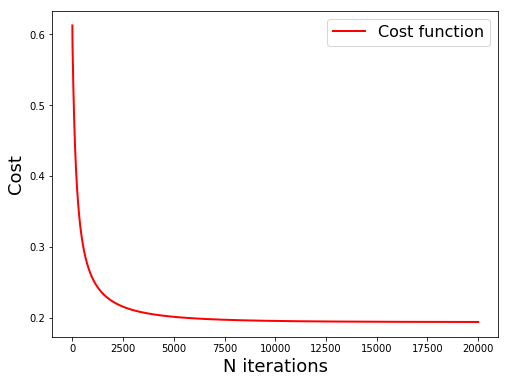

In [6]:
# Initialize weights
weights = np.array([0.0,0.0,0.0])

# Caculate weights with gradient descent
Niter=20000
learning_speed = 0.1
weights_new, cost_history = train(features_train, labels_train, weights, learning_speed,Niter)
print('Weights:',weights_new)

# Plot cost function evolution
x = np.linspace(1,Niter,Niter)
fig, axes = plt.subplots(figsize=(8,6))
axes.plot(x,cost_history,'r-',lw=2,label='Cost function')
axes.set_xlabel('N iterations',fontsize=18)
axes.set_ylabel('Cost',fontsize=18)
#axes.grid()
plt.legend(loc='upper right',fontsize=16)

## 6. Results

Run the steps below. Interpret these results.

### Accuracy of predictions

In [7]:
decision_boundary = np.vectorize(decision_boundary)

# train dataset
predicted_probabilities_train = predict(features_train, weights)
predicted_labels_train = decision_boundary(predicted_probabilities_train).flatten()
accuracy_prediction_train = accuracy(decision_boundary(predicted_labels_train), labels_train)
print('Accuracy of predictions (train dataset): %.3f' % accuracy_prediction_train)

# test dataset
predicted_probabilities_test = predict(features_test, weights)
predicted_labels_test = decision_boundary(predicted_probabilities_test).flatten()
accuracy_prediction_test = accuracy(decision_boundary(predicted_labels_test), labels_test)
print('Accuracy of predictions (test dataset): %.3f' % accuracy_prediction_test)

Accuracy of predictions (train dataset): 0.910
Accuracy of predictions (test dataset): 0.900


### Predicted probability distributions

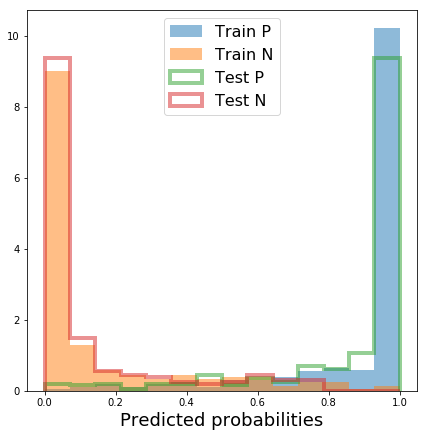

In [8]:
plt.figure(figsize=(7, 7))
bins = np.linspace(0,1,15)
n, bins, patches = plt.hist(predicted_probabilities_train[labels_train>0.5], bins, alpha=0.5, label='Train P', normed=1)
plt.hist(predicted_probabilities_train[labels_train<0.5], bins, alpha=0.5, label='Train N', normed=1)
plt.hist(predicted_probabilities_test[labels_test>0.5], bins, alpha=0.5, label='Test P', normed=1,histtype='step',lw=4)
plt.hist(predicted_probabilities_test[labels_test<0.5], bins, alpha=0.5, label='Test N', normed=1,histtype='step',lw=4)
plt.xlabel('Predicted probabilities',fontsize=18)
plt.legend(loc='best',fontsize=16)

### ROC Curve

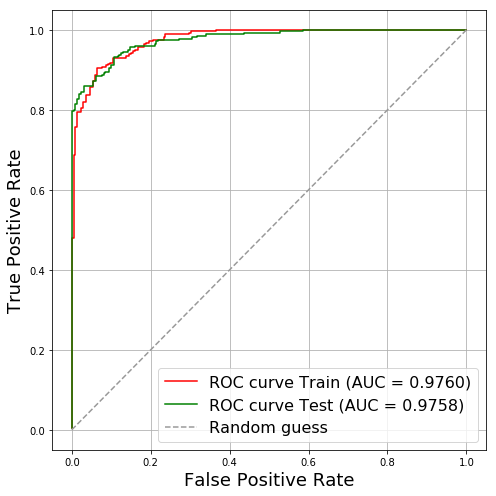

In [9]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_predict

#target = np.concatenate((np.zeros(x_train.shape[0]),np.ones(x_test.shape[0])))
#scores = np.concatenate((norm_train,norm_test))  

plt.figure(figsize=(7, 7))
# Train set                   
fp, vp, thresholds = roc_curve(labels_train,predicted_probabilities_train,pos_label=1,drop_intermediate='False')
roc_auc = auc(fp, vp)
plt.plot(fp,vp,color='red',label='ROC curve Train (AUC = %0.4f)'%(roc_auc))
# Test set                   
fp, vp, thresholds = roc_curve(labels_test,predicted_probabilities_test,pos_label=1,drop_intermediate='False')
roc_auc = auc(fp, vp)
plt.plot(fp,vp,color='green',label='ROC curve Test (AUC = %0.4f)'%(roc_auc))

plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate',fontsize=18)
plt.plot([0, 1],[0, 1],linestyle='--',color=(0.6, 0.6, 0.6),label='Random guess')
plt.grid()
plt.legend(loc="best",fontsize=16)
plt.tight_layout()
#plt.savefig("images/ROC.png")

### Confusion matrix

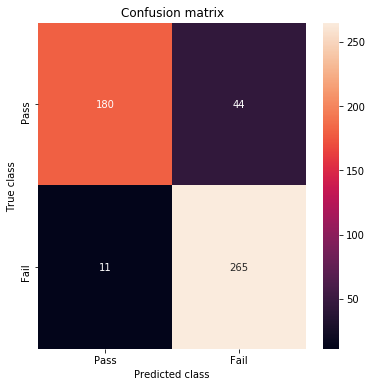

False positive rate = 19.64 %
True positive rate = 96.01 %


In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

LABELS = ["Pass", "Fail"]

threshold = 0.2

y_pred = [1 if e > threshold else 0 for e in predicted_probabilities_test]
conf_matrix = confusion_matrix(labels_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

NN = conf_matrix[0,0]
NF = conf_matrix[0,1]
FN = conf_matrix[1,0]
FF = conf_matrix[1,1]
print('False positive rate = %.2f %%' % (NF/(NN+NF)*100))
print('True positive rate = %.2f %%' % (FF/(FN+FF)*100))


## Optional: generate new data